In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv("/content/economic_index.csv")

In [18]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [20]:
#Drop unneccessary columns
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [21]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [22]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


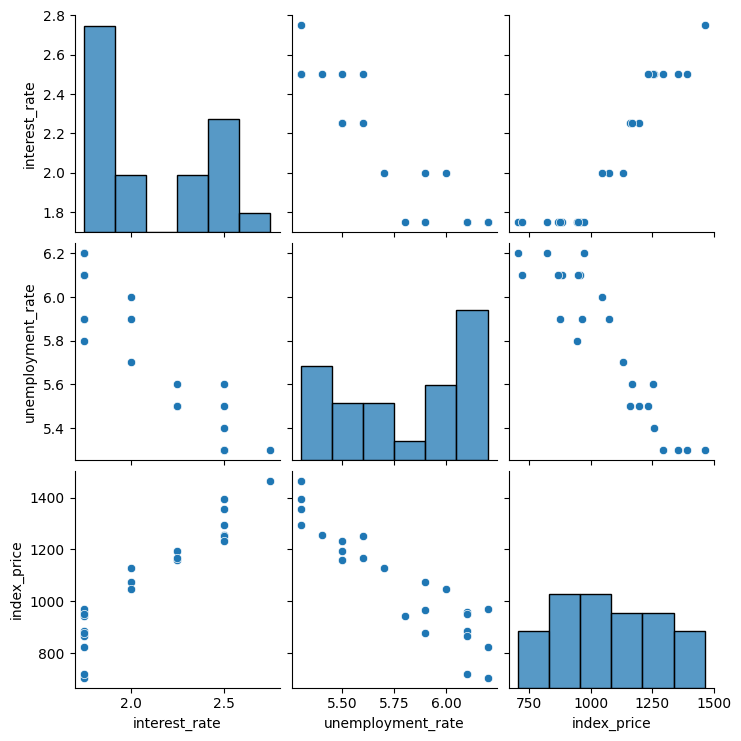

In [23]:
#Visualisation
import seaborn as sns
sns.pairplot(df)

In [24]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

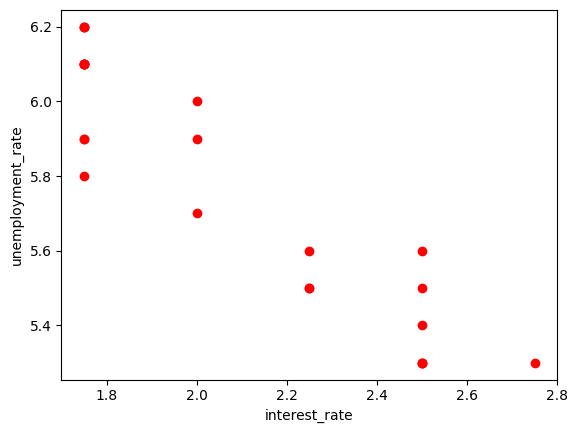

In [28]:
#Visualise the datapoints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [30]:
#Independent and dependent features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [34]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [35]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [36]:
y.shape

(24,)

In [37]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=42)

In [40]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

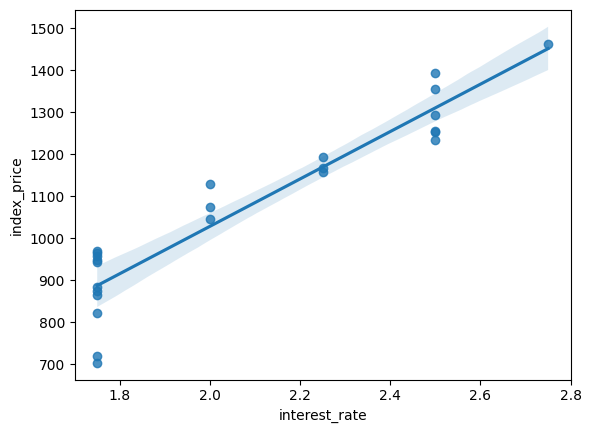

In [43]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

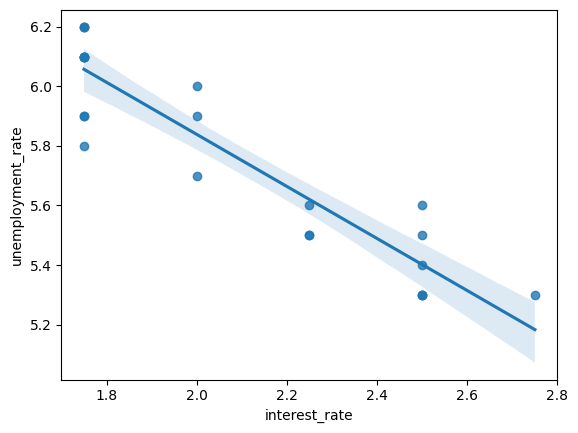

In [46]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
x_scaled=scaler.fit_transform(x_train)

In [49]:
x_scaled_test=scaler.transform(x_test)

In [50]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [51]:
regression.fit(x_scaled,y_train)

LinearRegression()

In [57]:
#Cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_scaled,y_train,
                                 scoring='neg_mean_squared_error',
                                 cv=3)

In [58]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [59]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [61]:
#Prediction
y_pred=regression.predict(x_scaled_test)

In [62]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [64]:
#Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [65]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [66]:
#R2 = 1-(ssr/sst)

In [67]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8278978091457145


In [68]:
#Adjusted r2 = 1 - [(1-r2) * (n -1)/(n-k-1)]

In [70]:
#Display adjusted r2
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_scaled_test.shape[1]-1)

0.7131630152428576

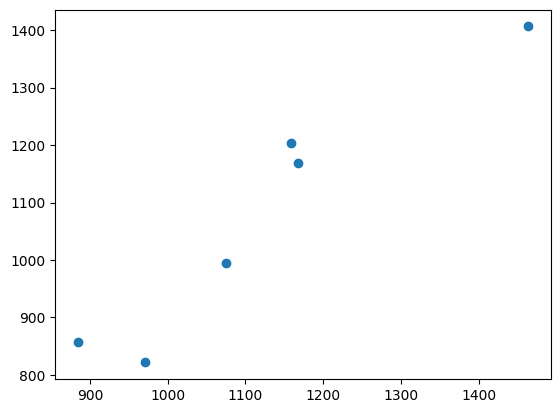

In [71]:
#Assumptions
plt.scatter(y_test,y_pred)

In [73]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


/tmp/ipython-input-3349716253.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='index_price', ylabel='Density'>

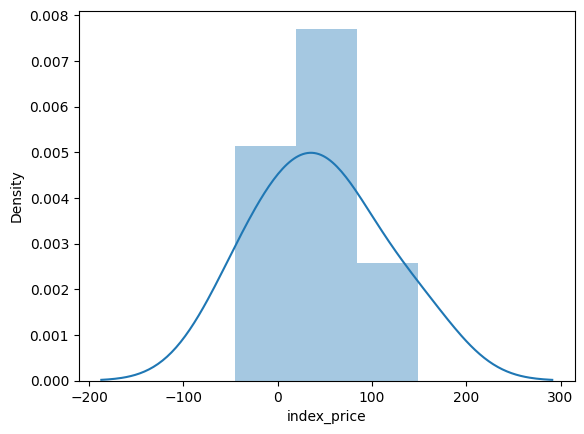

In [75]:
#Plot residuals
sns.distplot(residuals,kde=True)

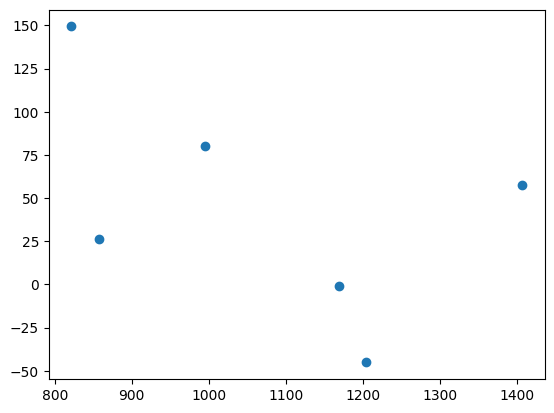

In [76]:
#Create scatter plot with respect to residuals and predictions
plt.scatter(y_pred,residuals)

In [78]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [79]:
print(regression.intercept_)

1053.4444444444443
